C:\Users\MUSTAQEEM\AppData\Local\Temp\ipykernel_7496\2146959947.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

First 5 rows of dataset:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065132,72.671325,71.845354,72.415322,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB
Mean Squared Error: 4.96


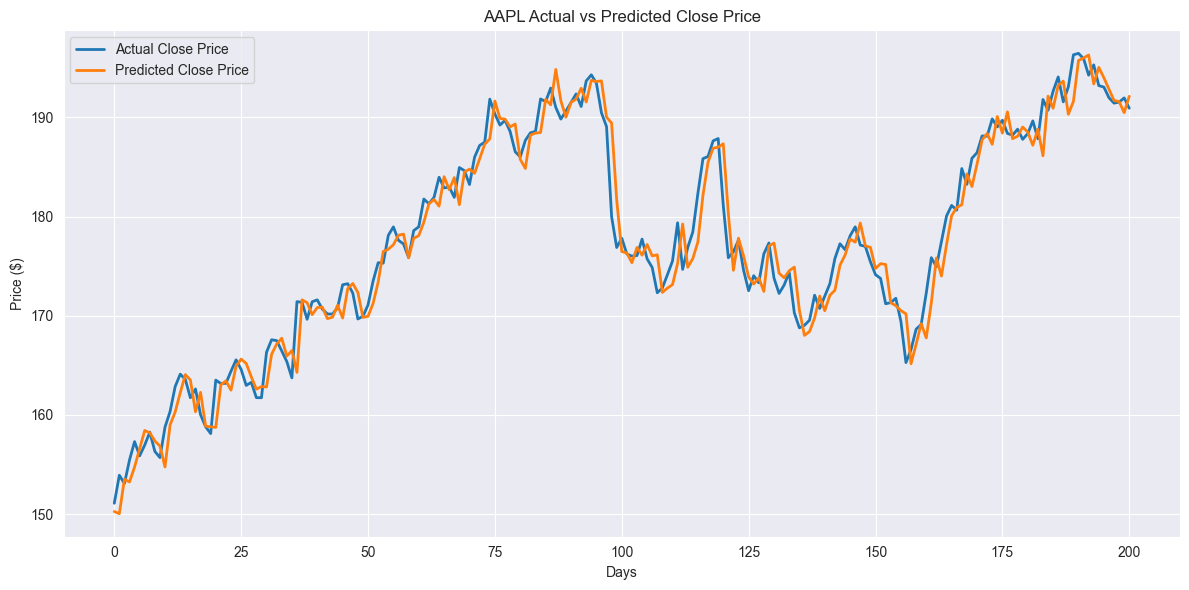


Insights:
1. The model's predictions generally follow the trend of the actual prices, but short-term fluctuations are harder to capture.
2. Mean Squared Error indicates the average squared difference between predictions and actual prices.
3. Using more advanced models like Random Forest or LSTM could improve performance.


In [1]:
# --------------------------------------------
# Task 2: Predict Future Stock Prices (Short-Term)
# Objective:
# Use historical stock data to predict the next day's closing price
# --------------------------------------------

# Import libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --------------------------------------------
# Step 1: Define the problem
# --------------------------------------------
# Goal: Given historical stock prices (Open, High, Low, Volume),
# predict the next day's closing price.

# --------------------------------------------
# Step 2: Load the dataset from Yahoo Finance
# --------------------------------------------
stock_symbol = 'AAPL'  # Apple stock
df = yf.download(stock_symbol, start='2020-01-01', end='2023-12-31')

# Check the first few rows
print("First 5 rows of dataset:")
display(df.head())

# Check dataset info
print("\nDataset Info:")
df.info()

# --------------------------------------------
# Step 3: Preprocess the data
# --------------------------------------------
# Remove missing values
df.dropna(inplace=True)

# Create target variable: next day's Close price
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# --------------------------------------------
# Step 4: Train-test split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# --------------------------------------------
# Step 5: Train the model
# --------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# --------------------------------------------
# Step 6: Make predictions
# --------------------------------------------
y_pred = model.predict(X_test)

# --------------------------------------------
# Step 7: Evaluate the model
# --------------------------------------------
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# --------------------------------------------
# Step 8: Visualization of Actual vs Predicted
# --------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', linewidth=2)
plt.plot(y_pred, label='Predicted Close Price', linewidth=2)
plt.title(f'{stock_symbol} Actual vs Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------
# Step 9: Insights
# --------------------------------------------
print("\nInsights:")
print("1. The model's predictions generally follow the trend of the actual prices, but short-term fluctuations are harder to capture.")
print("2. Mean Squared Error indicates the average squared difference between predictions and actual prices.")
print("3. Using more advanced models like Random Forest or LSTM could improve performance.")